In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from libs import sudukoSolver
from utils import helpers


In [19]:
#width = 960
#height = 720
# Initialisation de la taille des images
heightImg = 450
widthImg = 450
# Chargement du modèle Keras pour la prédiction des chiffres
model = load_model('./model/model_trained.keras')

In [5]:
imagePath='images/1.png'
img = cv2.imread(imagePath)
height, width, _ = img.shape
#img = cv2.resize(img, (width, height))
img_result = img.copy()

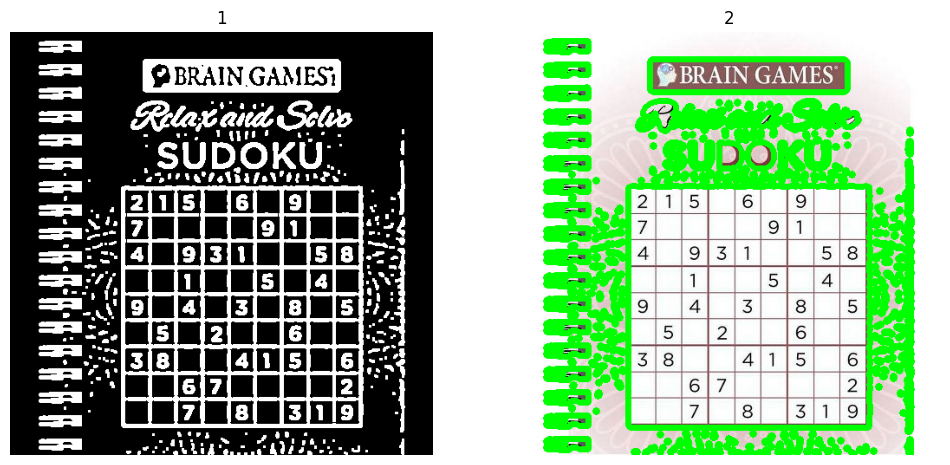

In [20]:
imgThreshold = helpers.preProcess(img)
contours, hierarchy = helpers.getContours(imgThreshold)
imageAllContours=helpers.drawContours(img, contours)
helpers.showMultipleImages([imgThreshold,imageAllContours])

In [21]:
contours, hierarchy = helpers.getContours(imgThreshold)
biggest, maxArea, countour = helpers.findBiggestContour(contours)
biggest = helpers.reorderPointsForWarp(biggest)

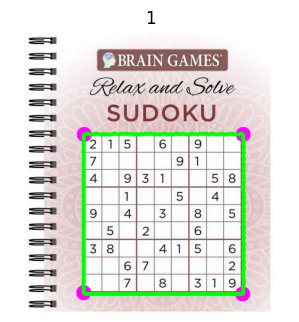

In [22]:
imageWithPoint = helpers.drawContours(img, biggest, (255, 0, 255), 25)
imageWithContourAndPoint = helpers.drawContours(imageWithPoint, [countour])
helpers.showMultipleImages([imageWithContourAndPoint],1)

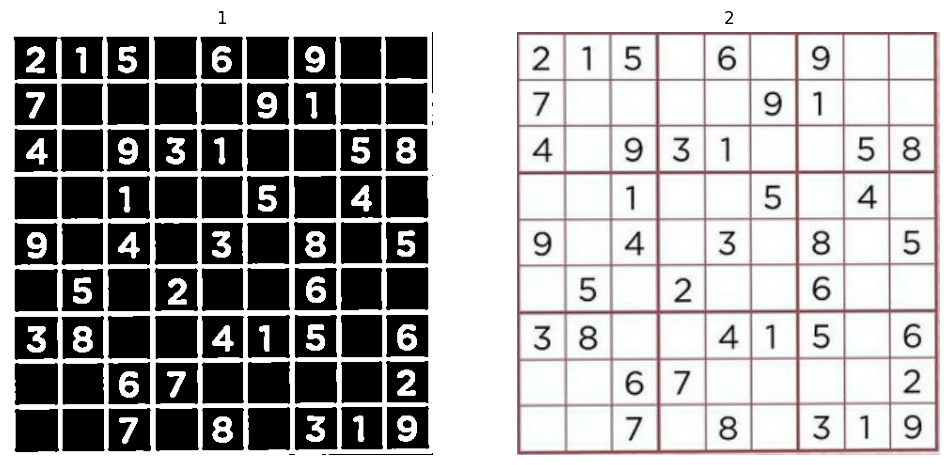

In [23]:
# Transformation de perspective pour obtenir une image de grille de Sudoku
pts1 = np.float32(biggest)
pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))

# Prétraitement de l'image de la grille
imgWarpProcessed = helpers.preProcess(imgWarpColored)
helpers.showMultipleImages([imgWarpProcessed,imgWarpColored])

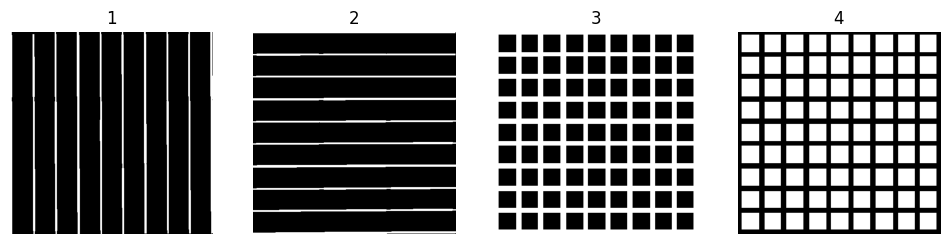

In [10]:
vertical_lines, horizontal_lines = helpers.get_grid_lines(imgWarpProcessed)
maskGrid = helpers.create_grid_mask(vertical_lines, horizontal_lines)
maskGrid2 = helpers.create_grid_mask2(vertical_lines, horizontal_lines)
helpers.showMultipleImages([vertical_lines,horizontal_lines,maskGrid2,maskGrid],4)


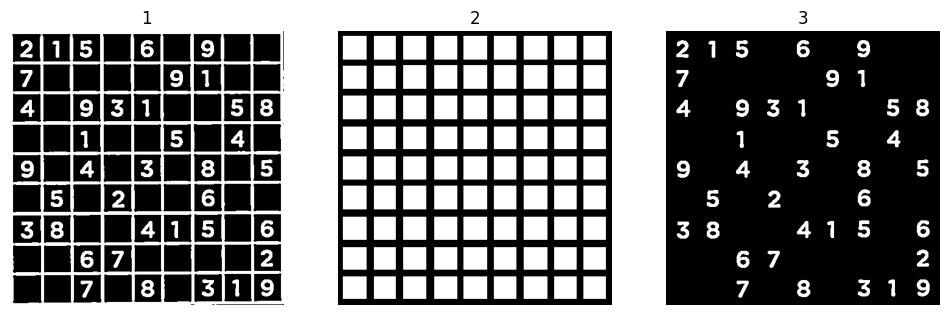

In [24]:
#s'ils sont pareils je le garde
numbersImages = cv2.bitwise_and(imgWarpProcessed, maskGrid)
helpers.showMultipleImages([imgWarpProcessed,maskGrid,numbersImages],3)

In [25]:
squares = helpers.split_into_squares(numbersImages)
squares_processed = helpers.clean_squares(squares)

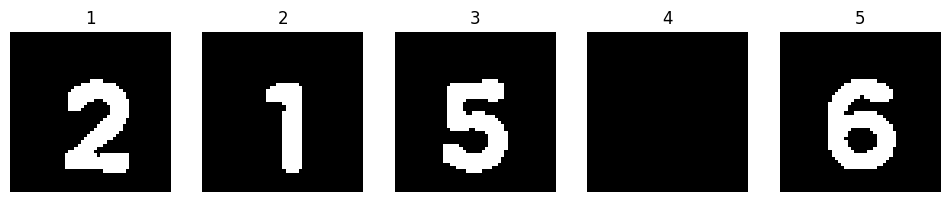

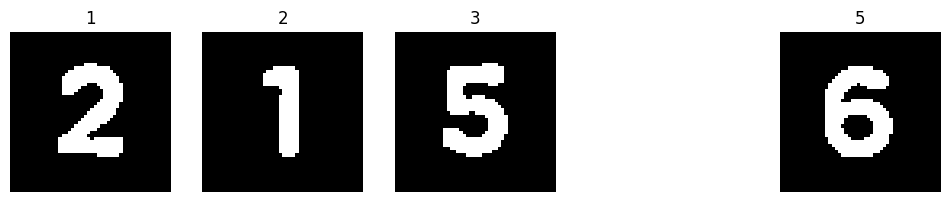

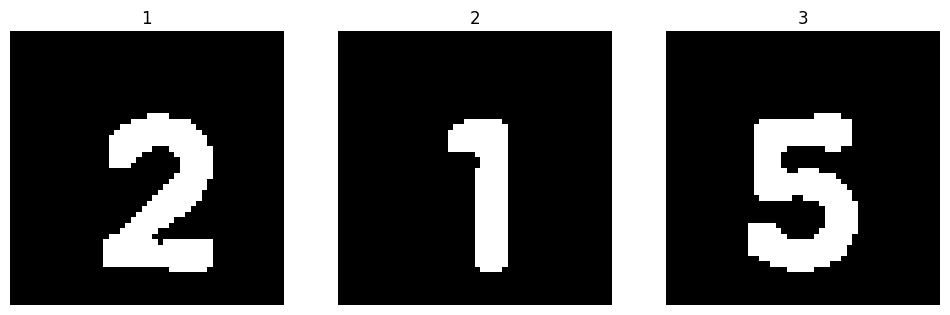

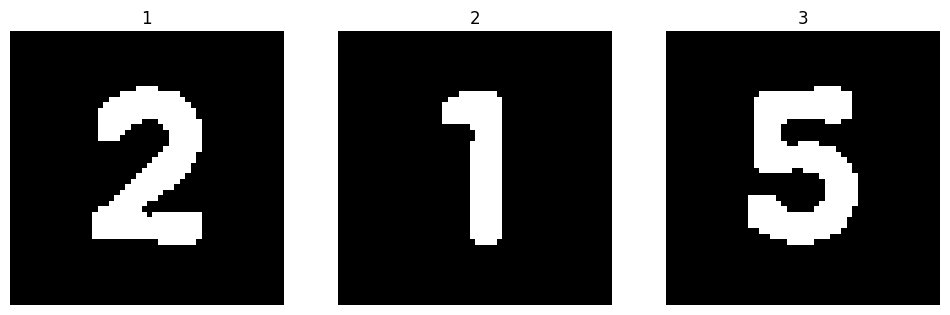

In [26]:
helpers.showMultipleImages(squares[:5],5)
helpers.showMultipleImages(squares_processed[:5],5)
helpers.showMultipleImages(squares[:3],3)
helpers.showMultipleImages(squares_processed[:3],3)

In [28]:
#helpers.showMultipleImages([imgWarpColored])

In [29]:
#helpers.getPredectionOneImage(squares[14],model,True)

In [27]:
numbers = helpers.getAllPreditions(squares_processed, model)
numbers = np.asarray(numbers)
posArray = np.where(numbers > 0 , 0 , 1)
board = np.array_split(numbers, 9)

1/1 [==============================] - 0s 30ms/step
[2] 1.0
1/1 [==============================] - 0s 8ms/step
[1] 0.9999423
1/1 [==============================] - 0s 7ms/step
[5] 1.0
1/1 [==============================] - 0s 8ms/step
[6] 1.0
1/1 [==============================] - 0s 8ms/step
[9] 1.0
1/1 [==============================] - 0s 7ms/step
[7] 1.0
1/1 [==============================] - 0s 8ms/step
[9] 1.0
1/1 [==============================] - 0s 8ms/step
[1] 0.99993765
1/1 [==============================] - 0s 8ms/step
[4] 1.0
1/1 [==============================] - 0s 7ms/step
[9] 1.0
1/1 [==============================] - 0s 7ms/step
[3] 0.9998104
1/1 [==============================] - 0s 8ms/step
[1] 0.999954
1/1 [==============================] - 0s 8ms/step
[5] 1.0
1/1 [==============================] - 0s 8ms/step
[8] 1.0
1/1 [==============================] - 0s 7ms/step
[1] 0.9999907
1/1 [==============================] - 0s 7ms/step
[5] 1.0
1/1 [====================

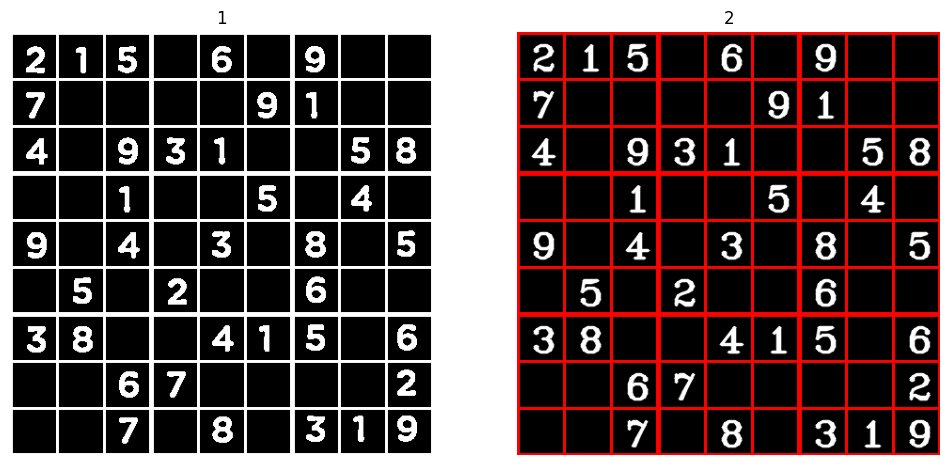

In [28]:
IA_numbers = helpers.drawSudokuDigits(helpers.imageBlank(heightImg,widthImg), numbers, (255,255,255))
helpers.showMultipleImages([helpers.drawGrid(numbersImages),helpers.drawGrid(IA_numbers)],2)
#helpers.showMultipleImages([numbersImages,IA_numbers],2)

In [29]:
sudukoSolver.solve(board)
sudukoSolver.print_board(board)

2 1 5  | 4 6 8  | 9 3 7
7 3 8  | 5 2 9  | 1 6 4
4 6 9  | 3 1 7  | 2 5 8
- - - - - - - - - - - - - 
6 2 1  | 8 9 5  | 7 4 3
9 7 4  | 1 3 6  | 8 2 5
8 5 3  | 2 7 4  | 6 9 1
- - - - - - - - - - - - - 
3 8 2  | 9 4 1  | 5 7 6
1 9 6  | 7 5 3  | 4 8 2
5 4 7  | 6 8 2  | 3 1 9


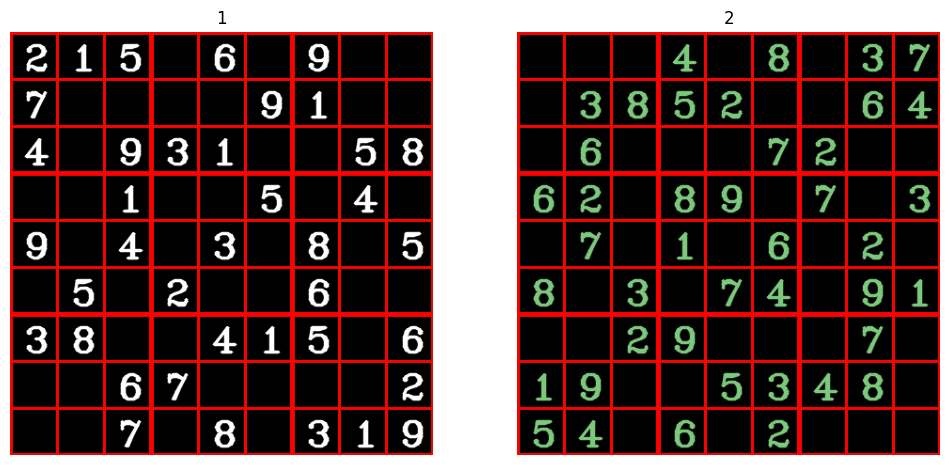

In [30]:
flatList = [item for sublist in board for item in sublist]
solvedNumbers = flatList * posArray
imgSolvedDigits = helpers.drawSudokuDigits(helpers.imageBlank(heightImg,widthImg), solvedNumbers, (124,200,124))
helpers.showMultipleImages([helpers.drawGrid(IA_numbers),helpers.drawGrid(imgSolvedDigits)],2)

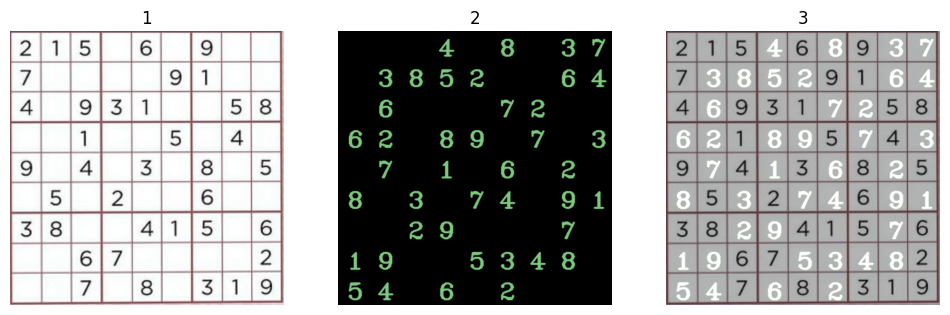

In [31]:
inv_perspective = cv2.addWeighted(imgSolvedDigits, 0.9, imgWarpColored, 0.7, 1)


helpers.showMultipleImages([imgWarpColored,imgSolvedDigits,inv_perspective],3)

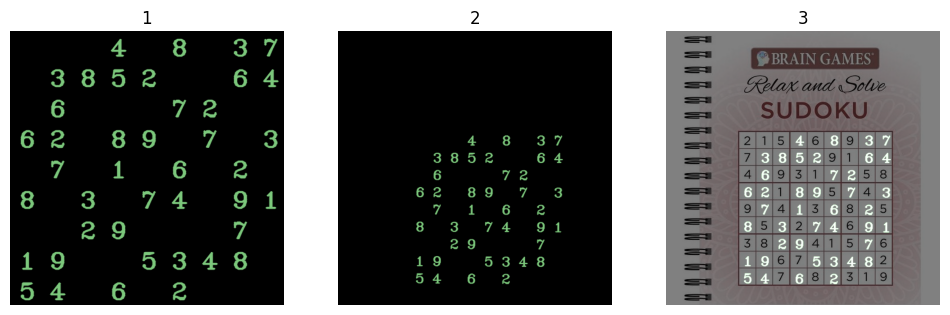

In [32]:
pts2 = np.float32(biggest) # PREPARE POINTS FOR WARP
pts1 =  np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PRE
matrix = cv2.getPerspectiveTransform(pts1, pts2)  # GER
imgInvWarpColored = img.copy()
imgInvWarpColored = cv2.warpPerspective(imgSolvedDigits, matrix, (width, height))
inv_perspective = cv2.addWeighted(imgInvWarpColored, 1, img, 0.5, 1)
img_result = inv_perspective
#imgWarpColored
helpers.showMultipleImages([imgSolvedDigits,imgInvWarpColored,img_result],3)

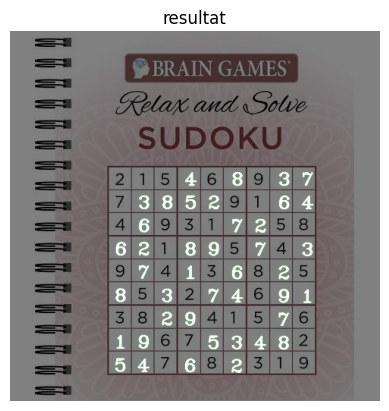

In [33]:
helpers.showImage(img_result, 'resultat')